# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed. This homework is primarily about having fun with interpolation. If any question is unclear, or there are any typos, let us know!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import roots_chebyt, roots_legendre
from scipy.integrate import newton_cotes

import interpolators

## Problem 0 (35 points)
In this problem you will play around with interpolation using different choices of nodes.

### Part A (10 points)
Create a class that wraps `BarycentricInterpolator` to help you interpolate a function `f` on the interval `I=[a,b]` using a degree `n-1` polnynomial passing through `n` nodes. Your class should allow the user to choose between Chebyshev, Legendre, or equi-spaced nodes, but it should default to Chebyshev. 

You can get the Chebyshev nodes on the interval $[-1,1]$ using `scipy.special.roots_chebyt` and you can get the Gauss-Legendre nodes on the interval $[-1,1]$ using `scipy.special.roots_legendre`. Be sure to shift these nodes to the interval $I$.

Your class should have three methods:
* `__init__` which creates the interpolation nodes, evaluates the function at those nodes, and initializes a BarycentricInterpolator
* `__call__` which evaluate the inerpolant a specified `x` using the `BarycentricInterpolator`
* `__string__` which returns a handy description, which will eventually go into a legend

To keep things neat, put your class in the module `interpolators.py`

--------

See the `BarycentricInterval` class defined in the `interpolators.py` module.

### Part B (5 points)
Create a class that wraps `interp1d` to create a linear spline (piecewise linear interpolant) of a function at equally spaced points. It should have the same methods as the class from part a.

--------

See the `LinSplineInterval` class defined in the `interpolators.py` module.

### Part C (5 points)
Make a helper function `plot_data` in `interpolators.py` which easily plots data for you, with the calling sequence
`plot_data(dats, legs, xlab, ylab)` where `dats` is a list of arrays to be plotted, `legs` is a list of the corresponding legend entries, and `xlab` and `ylab` are axis labels.

For full marks, this plot should have all the elements discussed in class (different marker or line styles, thick lines, sensible font size, legend, etc...).

-----

Below, we preview the function that we will study in Problem 0, Part (D) below by using our new `plot_data` function to plot four interpolants of the function $f(x) = \frac{1}{1 + 25x^2}$ on the interval $I = [-1, 1]$ using 50 nodes for each method. We find that at this volume of nodes, our interpolants are all good approximations for the true function (in the background in black).

Text(0.5, 1.0, 'Interpolants of $f(x) = \\frac{1}{1+25x^2}$ on $I = [-1, 1]$')

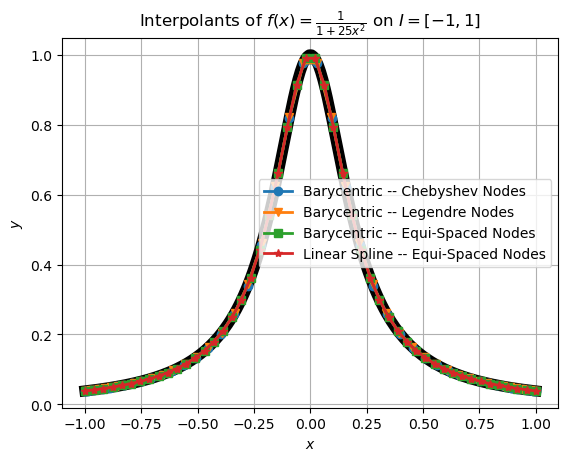

In [2]:
# Define function of interest
f = lambda x : 1 / (1 + 25*x**2)

# Generate interpolants
data_cheby = interpolators.BarycentricInterval(f, -1, 1, 50, node_type = "Chebyshev")
data_legendre = interpolators.BarycentricInterval(f, -1, 1, 50, node_type = "Legendre")
data_bary_equi = interpolators.BarycentricInterval(f, -1, 1, 50, node_type = "Equi-Spaced")
data_lin_spline = interpolators.LinSplineInterval(f, -1, 1, 50)

# Organize interpolants
dats = np.array([[data_cheby.nodes, data_cheby.vals],
                 [data_legendre.nodes, data_legendre.vals],
                 [data_bary_equi.nodes, data_bary_equi.vals],
                 [data_lin_spline.nodes, data_lin_spline.vals]])

# Organize legend entries
legs = np.array([data_cheby.__string__(),
                 data_legendre.__string__(),
                 data_bary_equi.__string__(),
                 data_lin_spline.__string__()])

# Plot
plt.plot(np.linspace(-1, 1, 200),
         f(np.linspace(-1, 1, 200)),
         c = "k", linewidth = 8)
interpolators.plot_data(dats, legs, r"$x$", r"$y$")
plt.title(r"Interpolants of $f(x) = \frac{1}{1+25x^2}$ on $I = [-1, 1]$")


### Part D (10 points)
In this question, you will use the classes from the previous questions to interpolate the function $f(x)=\frac{1}{1+25x^2}$ on the interval $I=[-1,1]$. Make a plot of the error generated when using all the methods to evaluate $f(1/e)$ for $n=2,3,\ldots, 50$. Which of the **four** interpolation strategies performed best?

-------

As we see in the plot below, depending on the number of nodes, different interpolation strategies give estimates of $f(\frac{1}{e})$ with the lowest error. In general, it appears that our Barycentric interpolant with equispaced nodes gives the lowest error, especially for larger numbers of nodes. On the other hand, our linear spline interpolant consistently gives some of the greatest approximation errors, particularly at larger numbers of nodes. The poor performance of the linear spline approach is not surprising. Whereas our three other interpolants are Barycentric, and thus higher-order polynomials that can approximate the curvature of $f(x)$, our linear spline interpolant is piecewise linear, and therefore cannot mimic the curvature of $f(x)$, yielding greater errors of estimation.

[]

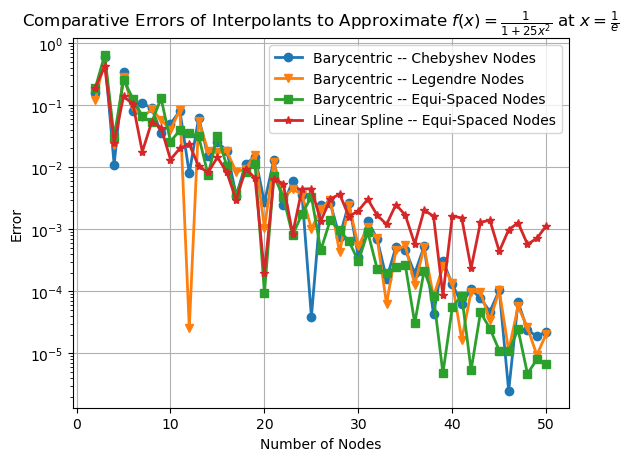

In [3]:
# Define function of interest
f = lambda x : 1 / (1 + 25*x**2)

# Numbers of nodes, 2 thru 50
num_nodes = np.arange(2, 51)

# Initialize empty array where we will store errors for each approach
errors = np.zeros((len(num_nodes), 4))

# Compute errors for each approach with each # of nodes
for i in num_nodes:
    data_cheby = interpolators.BarycentricInterval(f, -1, 1, i, node_type = "Chebyshev")
    data_legendre = interpolators.BarycentricInterval(f, -1, 1, i, node_type = "Legendre")
    data_bary_equi = interpolators.BarycentricInterval(f, -1, 1, i, node_type = "Equi-Spaced")
    data_lin_spline = interpolators.LinSplineInterval(f, -1, 1, i)

    errors[i-2, 0] = abs(data_cheby(1/np.e) - f(1/np.e))
    errors[i-2, 1] = abs(data_legendre(1/np.e) - f(1/np.e))
    errors[i-2, 2] = abs(data_bary_equi(1/np.e) - f(1/np.e))
    errors[i-2, 3] = abs(data_lin_spline(1/np.e) - f(1/np.e))

# Organize errors for plotting with plot_data() from Part (C)
dats = np.array([[num_nodes, errors[:, 0]],
                 [num_nodes, errors[:, 1]],
                 [num_nodes, errors[:, 2]],
                 [num_nodes, errors[:, 3]]])

# Organize legend labels for plotting with plot_data() from Part (C)
legs = np.array([data_cheby.__string__(),
                 data_legendre.__string__(),
                 data_bary_equi.__string__(),
                 data_lin_spline.__string__()])

# Plotting
interpolators.plot_data(dats, legs, "Number of Nodes", "Error")
plt.title(r"Comparative Errors of Interpolants to Approximate $f(x) = \frac{1}{1+25x^2}$ at $x = \frac{1}{e}$")
plt.semilogy()

[]

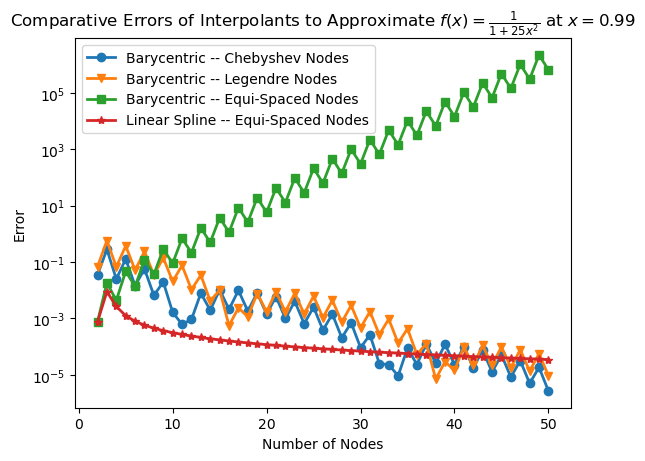

In [17]:
### Per Prof. Goodwill's suggestion, experimenting with a point closer to the edge of our interval.

# Define function of interest
f = lambda x : 1 / (1 + 25*x**2)

# Numbers of nodes, 2 thru 50
num_nodes = np.arange(2, 51)

# Initialize empty array where we will store errors for each approach
errors = np.zeros((len(num_nodes), 4))

# Compute errors for each approach with each # of nodes
for i in num_nodes:
    data_cheby = interpolators.BarycentricInterval(f, -1, 1, i, node_type = "Chebyshev")
    data_legendre = interpolators.BarycentricInterval(f, -1, 1, i, node_type = "Legendre")
    data_bary_equi = interpolators.BarycentricInterval(f, -1, 1, i, node_type = "Equi-Spaced")
    data_lin_spline = interpolators.LinSplineInterval(f, -1, 1, i)

    errors[i-2, 0] = abs(data_cheby(0.99) - f(0.99))
    errors[i-2, 1] = abs(data_legendre(0.99) - f(0.99))
    errors[i-2, 2] = abs(data_bary_equi(0.99) - f(0.99))
    errors[i-2, 3] = abs(data_lin_spline(0.99) - f(0.99))

# Organize errors for plotting with plot_data() from Part (C)
dats = np.array([[num_nodes, errors[:, 0]],
                 [num_nodes, errors[:, 1]],
                 [num_nodes, errors[:, 2]],
                 [num_nodes, errors[:, 3]]])

# Organize legend labels for plotting with plot_data() from Part (C)
legs = np.array([data_cheby.__string__(),
                 data_legendre.__string__(),
                 data_bary_equi.__string__(),
                 data_lin_spline.__string__()])

# Plotting
interpolators.plot_data(dats, legs, "Number of Nodes", "Error")
plt.title(r"Comparative Errors of Interpolants to Approximate $f(x) = \frac{1}{1+25x^2}$ at $x = 0.99$")
plt.semilogy()

### Part E (5 points)
Repeat part D using the function $g(x)=\exp(x)$ on $I=[0,1]$. Do you notice anything different?

-------

Now, our linear spline consistently gives the greatest approximation errors of $g(\frac{1}{e})$, regardless of the number of nodes. Each of our three Barycentric interpolants appear to be performing about as well as one another, each better than the others for some numbers of nodes but worse than the others for other numbers of nodes.

[]

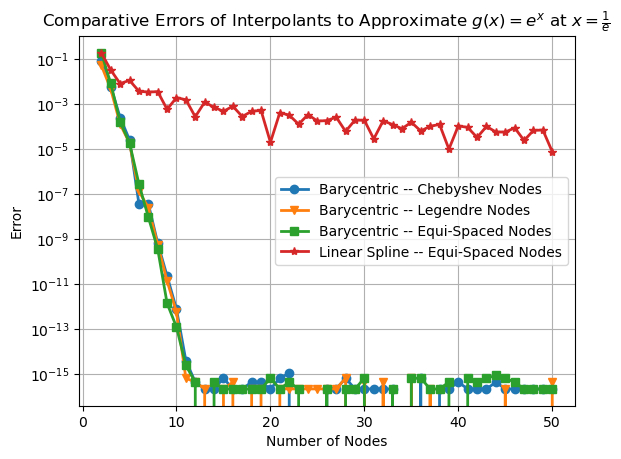

In [4]:
# Define function of interest
f = lambda x : np.exp(x)

# Numbers of nodes, 2 thru 50
num_nodes = np.arange(2, 51)

# Initialize empty array where we will store errors for each approach
errors = np.zeros((len(num_nodes), 4))

# Compute errors for each approach with each # of nodes
for i in num_nodes:
    data_cheby = interpolators.BarycentricInterval(f, 0, 1, i, node_type = "Chebyshev")
    data_legendre = interpolators.BarycentricInterval(f, 0, 1, i, node_type = "Legendre")
    data_bary_equi = interpolators.BarycentricInterval(f, 0, 1, i, node_type = "Equi-Spaced")
    data_lin_spline = interpolators.LinSplineInterval(f, 0, 1, i)

    errors[i-2, 0] = abs(data_cheby(1/np.e) - f(1/np.e))
    errors[i-2, 1] = abs(data_legendre(1/np.e) - f(1/np.e))
    errors[i-2, 2] = abs(data_bary_equi(1/np.e) - f(1/np.e))
    errors[i-2, 3] = abs(data_lin_spline(1/np.e) - f(1/np.e))

# Organize errors for plotting with plot_data() from Part (C)
dats = np.array([[num_nodes, errors[:, 0]],
                 [num_nodes, errors[:, 1]],
                 [num_nodes, errors[:, 2]],
                 [num_nodes, errors[:, 3]]])

# Organize legend labels for plotting with plot_data() from Part (C)
legs = np.array([data_cheby.__string__(),
                 data_legendre.__string__(),
                 data_bary_equi.__string__(),
                 data_lin_spline.__string__()])

# Plotting
interpolators.plot_data(dats, legs, "Number of Nodes", "Error")
plt.title(r"Comparative Errors of Interpolants to Approximate $g(x) = e^x$ at $x = \frac{1}{e}$")
plt.semilogy()

[]

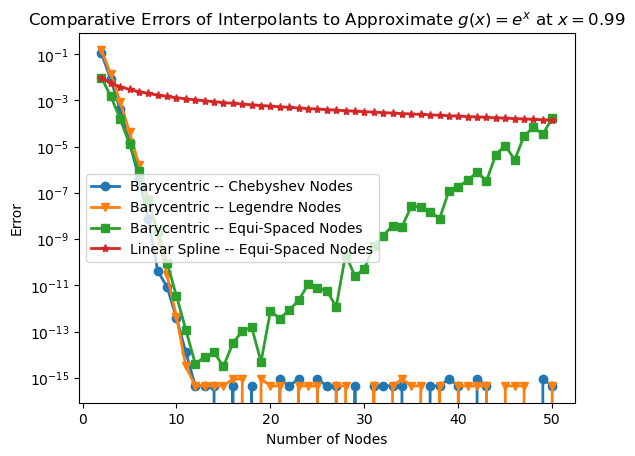

In [16]:
### Per Prof. Goodwill's suggestion, experimenting with a point closer to the edge of our interval.

# Define function of interest
f = lambda x : np.exp(x)

# Numbers of nodes, 2 thru 50
num_nodes = np.arange(2, 51)

# Initialize empty array where we will store errors for each approach
errors = np.zeros((len(num_nodes), 4))

# Compute errors for each approach with each # of nodes
for i in num_nodes:
    data_cheby = interpolators.BarycentricInterval(f, 0, 1, i, node_type = "Chebyshev")
    data_legendre = interpolators.BarycentricInterval(f, 0, 1, i, node_type = "Legendre")
    data_bary_equi = interpolators.BarycentricInterval(f, 0, 1, i, node_type = "Equi-Spaced")
    data_lin_spline = interpolators.LinSplineInterval(f, 0, 1, i)

    errors[i-2, 0] = abs(data_cheby(0.99) - f(0.99))
    errors[i-2, 1] = abs(data_legendre(0.99) - f(0.99))
    errors[i-2, 2] = abs(data_bary_equi(0.99) - f(0.99))
    errors[i-2, 3] = abs(data_lin_spline(0.99) - f(0.99))

# Organize errors for plotting with plot_data() from Part (C)
dats = np.array([[num_nodes, errors[:, 0]],
                 [num_nodes, errors[:, 1]],
                 [num_nodes, errors[:, 2]],
                 [num_nodes, errors[:, 3]]])

# Organize legend labels for plotting with plot_data() from Part (C)
legs = np.array([data_cheby.__string__(),
                 data_legendre.__string__(),
                 data_bary_equi.__string__(),
                 data_lin_spline.__string__()])

# Plotting
interpolators.plot_data(dats, legs, "Number of Nodes", "Error")
plt.title(r"Comparative Errors of Interpolants to Approximate $g(x) = e^x$ at $x = 0.99$")
plt.semilogy()

## Problem 1 (20 points)
Modify your previous classes to integrate the function `f` over the interval `I`. To do this, you should modify the `__init__` routine to generate quadrature weights such that $\int_a^bf(x)dx\approx \sum_i f(x_i) w_i$. You should also add a method `quad` that computes the sum, approximating the integral. 

The provided command for Legendre points already provides the required weights. To get the weights for the higher order interpolant through equispaced points, you can use `scipy.integrate.newton_cotes` (be aware of the default interval and number of points assumed by this function). The weights for the piecewise linear method are given in the course notes (see the Trapezoid rule). Be sure to rescale your weights so that the integral is computed over the interval $I=[a,b]$.

**NOTE:** There isn't a simple Python function to get the weights using Chebyshev nodes, so for this homework, we will skip it. For those interested, the quadrature method based on Chebyshev nodes is called "Clenshaw-Curtis quadrature". In case you missed it, **don't bother trying to get the quadrature weights for Chebyshev nodes**.

Test the accuracy of all three of your quadrature methods on the integral $\int^0_{-2} \frac{1}{1+25(x+1)^2} dx$ with $n=2,3,\ldots, 50$. Which of your **three** methods performed best?

------

As shown below, for relatively small numbers of nodes (less than around 10), our Newton-Cotes quadrature has the lowest approximation error of our three approaches --- but for node counts in excess of around 10, the error of our Newton-Cotes quadrature quickly explodes. The trapezoidal rule quadrature has lower errors than the Gauss-Legendre quadrature for between roughly 2 and 25 nodes, but for node counts in excess of around 25, the Gauss-Legendre quadrature has markedly lower errors than either other approach.

That the Gauss-Legendre quadrature outperforms the Newton-Cotes quadrature is not surprising. The Newton-Cotes quadrature is based on interpolation with evenly-spaced nodes, and is therefore subject to Runge's phenomenon, which becomes more and more pronounced (introducing greater and greater errors) as the number of nodes (hence the degree of the polynomial interpolant) grows. The Legendre nodes are more tactfully placed, mitigating Runge's phenomenon and allowing the Legendre quadrature to outperform the Newton-Cotes quadrature starting at relatively low node counts. 

It is also not surprising that the Legendre quadrature eventually outperforms the trapezoidal rule quadrature. After all, the Legendre quadrature uses a polynomial interpolant to approximate $f(x)$, whereas the trapezoidal rule only uses a piecewise linear interpolant. With sufficiently many nodes, the interpolant used by the Legendre quadrature is able to mimic the curvature of $f(x)$ in a way that a piecewise linear interpolant just can't, yielding a lower error when approximating the area under the curve.

[]

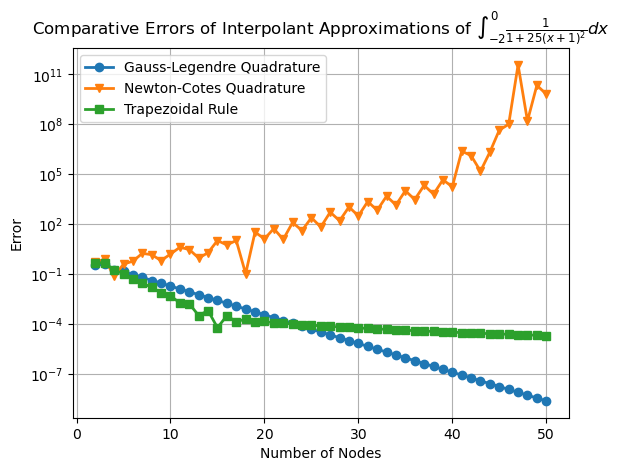

In [2]:
# Determine analytic solution to integral of interest
f = lambda x : 1 / (1 + 25 * (x+1)**2)
integral = sp.integrate.quad(f, -2, 0)[0]

# Numbers of nodes, 2 thru 50
num_nodes = np.arange(2, 51)

# Initialize empty array where we will store errors for each approach
errors = np.zeros((len(num_nodes), 3))

# Compute errors for each approach using each # of nodes
for i in num_nodes:
    data_legendre = interpolators.BarycentricInterval(f, -2, 0, i, node_type = "Legendre")
    data_bary_equi = interpolators.BarycentricInterval(f, -2, 0, i, node_type = "Equi-Spaced")
    data_lin_spline = interpolators.LinSplineInterval(f, -2, 0, i)

    errors[i-2, 0] = abs(data_legendre.quad() - integral)
    errors[i-2, 1] = abs(data_bary_equi.quad() - integral)
    errors[i-2, 2] = abs(data_lin_spline.quad() - integral)

# Organize errors for plotting with plot_data() from Part (C)
dats = np.array([[num_nodes, errors[:, 0]],
                 [num_nodes, errors[:, 1]],
                 [num_nodes, errors[:, 2]]])

# Organize legend labels for plotting with plot_data() from Part (C)
legs = np.array(["Gauss-Legendre Quadrature",
                 "Newton-Cotes Quadrature",
                 "Trapezoidal Rule"])

# Plotting
interpolators.plot_data(dats, legs, "Number of Nodes", "Error")
plt.title(r"Comparative Errors of Interpolant Approximations of $\int_{-2}^0 \frac{1}{1 + 25(x+1)^2} dx$")
plt.semilogy()

## Problem 2 (20 points)
In this problem we will explore the simplest method for getting quadrature weights. For simplicity, we shall assume that we are working on the interval $[-1,1]$.

Since quadrature rules are designed to integrate the polynomials of degree $n$ exactly, we can get the quadrature weights by ensuring that this is so. If we have already chosen the nodes $x_0,\ldots, x_n$, then we simply need to verify that
\begin{align*}
2&=\int_{-1}^1 1 dx = w_0 1+\cdots w_n 1\\
0&=\int_{-1}^1 x dx = w_0 x_0+\cdots w_n x_n\\
\frac{2}3&=\int_{-1}^1 x^2 dx = w_0 x_0^2+\cdots w_n x_n^2\\
\vdots \\
\frac{1-(-1)^{n+1}}{n+1}&=\int_{-1}^1 x^n dx = w_0 x_0^n+\cdots w_n x_n^n
\end{align*}
Write a function which solves the above linear system for a provided set of nodes. The function `numpy.vander` will help you to generate the system matrix.

You should test this function by finding the weights for computing an integral using 30 Gauss-Legendre nodes and comparing those weights to the weights provided by `scipy.special.roots_legendre`.

Once you have tested your function, use it to find the Newton-Cotes weights using 30 nodes. How close are your weights to those provided by `scipy.integrate.newton_cotes`?

-------

As shown below, our function is highly accurate. On average, the relative error of our 30 Legendre weights is roughly `1.4e-6`, while the relative error of our 30 Newton weights (once we have scaled them by the inverse of the equal space between nodes) is roughly `5.2e-5`.

In [37]:
# Vandermonde matrix
def weight_generator(nodes):
    """
    Generates quadrature weights corresponding to a given set of nodes.

    Parameter nodes is an ndarray of nodes corresponding to the desired weights.

    Returns weights, an ndarray of weights corresponding to nodes.
    """
    # Vector of integral evaluations
    f = lambda n : (1 - (-1)**(n+1))/(n+1)
    fs = np.zeros(len(nodes))
    for i in range(len(nodes)):
        fs[i] = f(i)

    # Vandermonde matrix
    V = np.vander(nodes, increasing = True).T

    # Generate and return weights
    weights = np.linalg.solve(V, fs)
    return weights
    
num_nodes = 30

# Test 1: Legendre

# Compute Legendre nodes
nodes_legendre = sp.special.roots_legendre(num_nodes)[0]

# Compute Legendre weights using our homegrown approach vs. scipy.special.roots_legendre()
my_weights_legendre = weight_generator(nodes_legendre)
true_weights_legendre = sp.special.roots_legendre(num_nodes)[1]

# A visual inspection of my_weights_legendre and true_weights_legendre shows that they are very
# similar. We attempt to summarize this in a single number with the mean relative error across 
# all 30 weights
print("Mean Relative Error in Legendre Weights:", np.mean(abs((my_weights_legendre - true_weights_legendre)/true_weights_legendre)))

# Test 2: Newton-Cotes

# Compute Newton-Cotes nodes
nodes_newton = np.linspace(-1, 1, num_nodes)

# Compute Newton-Cotes weights using our homegrown approach vs. scipy.integrate.newton_cotes()
# Note that we need to scale our homegrown weights by the reciprocal of our equal space between
# nodes, as this scaling is already built into scipy.integrate.newton_cotes().
my_weights_newton = weight_generator(nodes_newton) * (num_nodes-1)/(1 - -1)
true_weights_newton = sp.integrate.newton_cotes(num_nodes-1, 1)[0]

# A visual inspection of my_weights_newton and true_weights_newton shows that they are very
# similar. We attempt to summarize this in a single number with the mean relative error across
# all 30 weights
print("Mean Relative Error in Newton-Cotes Weights:", np.mean(abs((my_weights_newton - true_weights_newton)/true_weights_newton)))

Mean Relative Error in Legendre Weights: 1.4069734086283184e-06
Mean Relative Error in Newton-Cotes Weights: 5.2315446703878074e-05


## Feedback

If you would like share how long it took you to complete this assignment, it will help adjust the difficulty for future assignments.  You're welcome to share additional feedback as well.